In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import os 

from tqdm import tqdm

In [31]:
sns.set()

In [2]:
df_cinemas = pd.read_csv('data/moscow_cinemas.csv')
df_cinemas.head()

,Cinema,First day of screening,Screening Days,Title (original),IMDB ID
0,Метрополь / Metropol',01/01/1946,50.0,Разгром Японии,171687
1,Москва / Moskva,01/01/1946,15.0,Разгром Японии,171687
2,Родина / Rodina,01/01/1946,3.0,Разгром Японии,171687
3,Востоккино / Vostokkino,01/01/1946,45.0,Разгром Японии,171687
4,Баррикады / Barrikady,01/01/1946,2.0,Разгром Японии,171687


In [12]:
df_cinemas.shape

(45944, 5)

In [9]:
df_movies = pd.read_excel('final_version.xlsx') 
df_movies = df_movies.drop(columns=['Unnamed: 0'])
df_movies.head()

,title,year,genre,country,rating,director
0,Разгром Японии,1945,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
1,Близнецы,1945,Comedy,Soviet Union,6.8,Konstantin Yudin
2,Весенний вальс,1940,"Comedy, Music, Musical, Romance",United States,6.7,Henry Koster
3,Аршин Мал-Алан,1945,"Comedy, Musical",Soviet Union,7.7,"Nikolay Leshchenko, Rza Takhmasib"
4,Тахир и Зухра,1945,"History, Romance",Soviet Union,6.3,"Yuldash Agzamov, Nabi Ganiyev"


In [10]:
df_movies.isna().sum()

title        0
year         0
genre       28
country      1
rating      77
director     0
dtype: int64

In [18]:
df_left = df_cinemas.merge(df_movies, left_on='Title (original)', right_on='title', how='left')
df_left

,Cinema,First day of screening,Screening Days,Title (original),IMDB ID,title,year,genre,country,rating,director
0,Метрополь / Metropol',01/01/1946,50.0,Разгром Японии,171687,Разгром Японии,1945.0,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
1,Москва / Moskva,01/01/1946,15.0,Разгром Японии,171687,Разгром Японии,1945.0,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
2,Родина / Rodina,01/01/1946,3.0,Разгром Японии,171687,Разгром Японии,1945.0,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
3,Востоккино / Vostokkino,01/01/1946,45.0,Разгром Японии,171687,Разгром Японии,1945.0,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
4,Баррикады / Barrikady,01/01/1946,2.0,Разгром Японии,171687,Разгром Японии,1945.0,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
...,...,...,...,...,...,...,...,...,...,...,...
46541,Кинозал короткометражного фильма / Kinozal kor...,30/12/1955,3.0,Африка 2 серия,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
46542,Кинозал короткометражного фильма / Kinozal kor...,30/12/1955,3.0,Африка 2 серия,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
46543,Форум / Forum,30/12/1955,2.0,Яника,41518,Яника,1949.0,Comedy,Hungary,7.1,Márton Keleti
46544,Форум / Forum,30/12/1955,1.0,Боевое крещение,44160,Боевое крещение,1952.0,Drama,Hungary,NaN,Frigyes Bán


In [19]:
df_left.isna().sum()

Cinema                        0
First day of screening        0
Screening Days                1
Title (original)              0
IMDB ID                       0
title                      9425
year                       9425
genre                     10373
country                    9426
rating                    11386
director                   9425
dtype: int64

In [20]:
df = df_cinemas.merge(df_movies, left_on='Title (original)', right_on='title')
df

,Cinema,First day of screening,Screening Days,Title (original),IMDB ID,title,year,genre,country,rating,director
0,Метрополь / Metropol',01/01/1946,50.0,Разгром Японии,171687,Разгром Японии,1945,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
1,Москва / Moskva,01/01/1946,15.0,Разгром Японии,171687,Разгром Японии,1945,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
2,Родина / Rodina,01/01/1946,3.0,Разгром Японии,171687,Разгром Японии,1945,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
3,Востоккино / Vostokkino,01/01/1946,45.0,Разгром Японии,171687,Разгром Японии,1945,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
4,Баррикады / Barrikady,01/01/1946,2.0,Разгром Японии,171687,Разгром Японии,1945,"Documentary, War",Soviet Union,NaN,"Iosif Kheifits, Aleksandr Zarkhi"
...,...,...,...,...,...,...,...,...,...,...,...
37116,Ударник / Udarnik,17/12/1955,1.0,Дружба великих народов,49923,Дружба великих народов,1956,Documentary,Soviet Union,NaN,Roman Karmen
37117,Метрополь / Metropol',17/12/1955,1.0,Дружба великих народов,49923,Дружба великих народов,1956,Documentary,Soviet Union,NaN,Roman Karmen
37118,Центральный / Tsentral'nyĭ,17/12/1955,1.0,Дружба великих народов,49923,Дружба великих народов,1956,Documentary,Soviet Union,NaN,Roman Karmen
37119,Пионер / Pioner,17/12/1955,1.0,Дым в лесу,1673579,Дым в лесу,1955,Adventure,Soviet Union,6.4,"Yuriy Chulyukin, Yevgeni Karelov"


In [21]:
df['Cinema'].nunique()

69

## Средний рейтинг кинотеатра

In [28]:
cinemas_mean_rating = pd.DataFrame(df.groupby('Cinema').mean()['rating']).reset_index()
cinemas_mean_rating

/tmp/ipykernel_17667/752405679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cinemas_mean_rating = pd.DataFrame(df.groupby('Cinema').mean()['rating']).reset_index()


,Cinema,rating
0,Авангард / Avangard,6.485744
1,Аврора / Avrora,6.501059
2,Аквариум / Akvarium,6.581844
3,Арс / Ars,6.501119
4,Баррикады / Barrikady,6.457410
...,...,...
64,Экспресс / Ėkspress,6.526188
65,Эрмитаж / Ėrmitazh,6.542593
66,Юный зритель / IUnyĭ zritel',6.501379
67,им. III Интернационала / im. III Internatsionala,6.478049


In [29]:
cinemas_mean_rating['Cinema (russian)'] = cinemas_mean_rating['Cinema'].apply(lambda x: x.split('/')[0].strip())

In [30]:
cinemas_mean_rating

,Cinema,rating,Cinema (russian)
0,Авангард / Avangard,6.485744,Авангард
1,Аврора / Avrora,6.501059,Аврора
2,Аквариум / Akvarium,6.581844,Аквариум
3,Арс / Ars,6.501119,Арс
4,Баррикады / Barrikady,6.457410,Баррикады
...,...,...,...
64,Экспресс / Ėkspress,6.526188,Экспресс
65,Эрмитаж / Ėrmitazh,6.542593,Эрмитаж
66,Юный зритель / IUnyĭ zritel',6.501379,Юный зритель
67,им. III Интернационала / im. III Internatsionala,6.478049,им. III Интернационала


In [38]:
cinemas_mean_rating['rating'].nlargest(5)

6     7.450000
31    6.850000
20    6.845113
45    6.721154
7     6.716667
Name: rating, dtype: float64

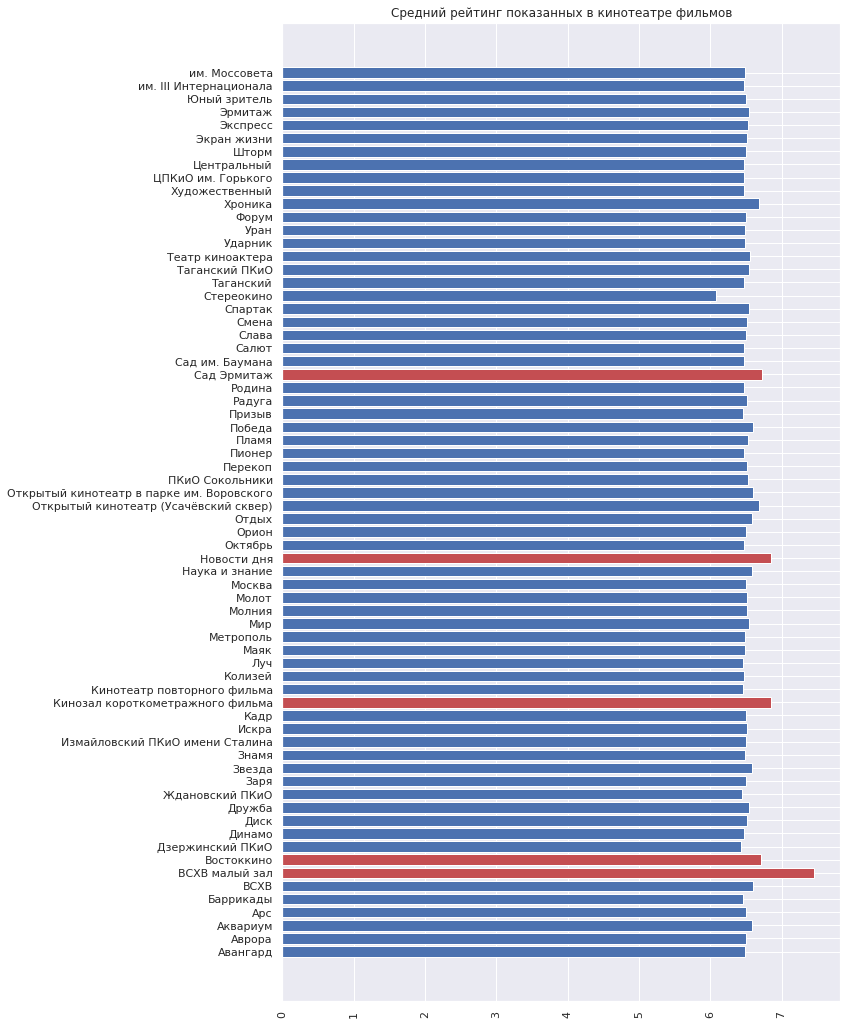

In [61]:
f = plt.figure(figsize=(10, 18)) 
plt.barh(cinemas_mean_rating['Cinema (russian)'], 
        cinemas_mean_rating['rating'],
       color=['r' if rating >= 6.716665 else 'b' for rating in cinemas_mean_rating['rating']]) 
plt.xticks(rotation=90) 
plt.title('Средний рейтинг показанных в кинотеатре фильмов')
plt.show()

In [62]:
f.savefig('cinema_mean_rating.jpeg')

Топ-5 по рейтингу: ВСХВ малый зал, Востоккино, Кинозал короткометражного фильма, Новости дня, Сад Эрмитаж